In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [3]:
# load dataset
FILE = 'data.csv'
df = pd.read_csv(FILE)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [20]:
len(df.columns)

96

<AxesSubplot: xlabel='Bankrupt?', ylabel='count'>

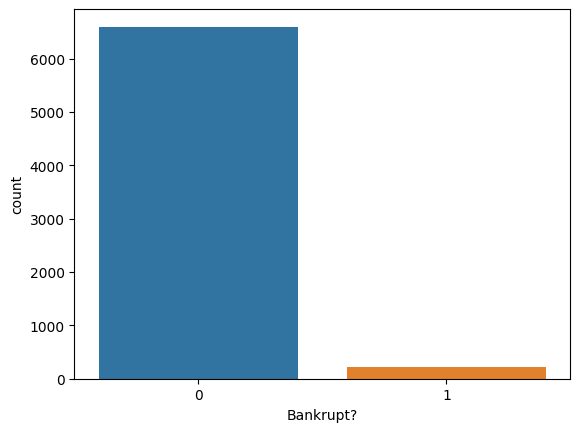

In [6]:
# huge data imbalance
sns.countplot(x=df['Bankrupt?'])

<AxesSubplot: >

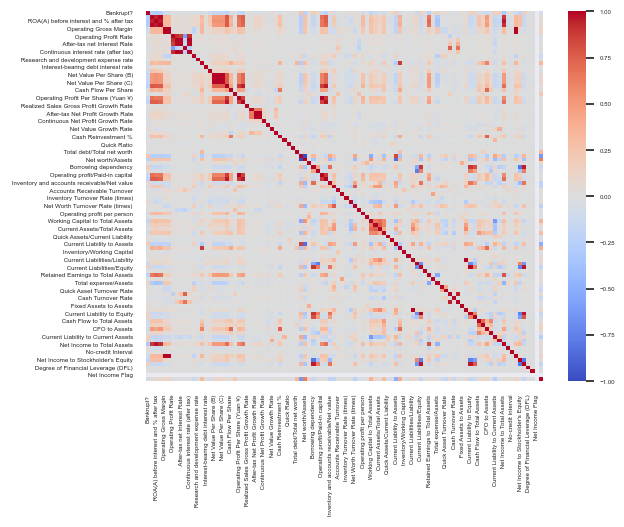

In [16]:
# some variables show correlations but not too many...
sns.set(font_scale=0.4)
sns.heatmap(df.corr(),cmap = "coolwarm")

In [18]:
# create features (X) and response (y) for data
X = df.drop(columns="Bankrupt?")
y = df['Bankrupt?']

In [19]:
# scale data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
pca40 = PCA(40)
pca60 = PCA(60)
pca_fit1 = pca40.fit_transform(X_scaled)
pca_fit2 = pca60.fit_transform(X_scaled)

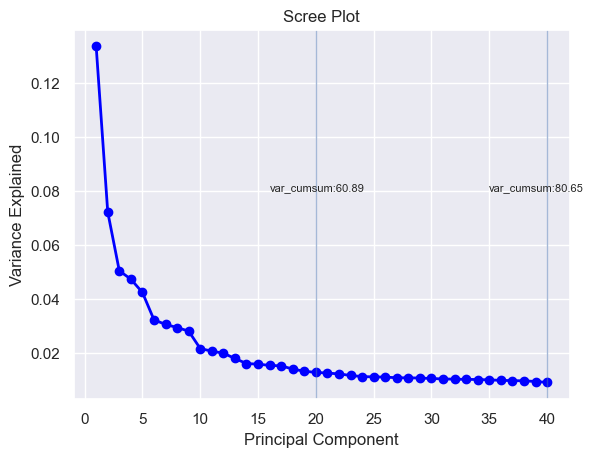

In [80]:
var_20 = round(sum(pca40.explained_variance_[:20]),2)
var_40 = round(sum(pca40.explained_variance_),2)

PC_values = np.arange(pca40.n_components_) + 1
plt.plot(PC_values, pca40.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.axvline(x=20, linewidth=1, color='b', alpha=0.5)
plt.annotate(f"var_cumsum:{var_20}", xy= (16,0.08), fontsize=8)
plt.axvline(x=40, linewidth=1, color='b', alpha=0.5)
plt.annotate(f"var_cumsum:{var_40}", xy= (35,0.08), fontsize=8)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

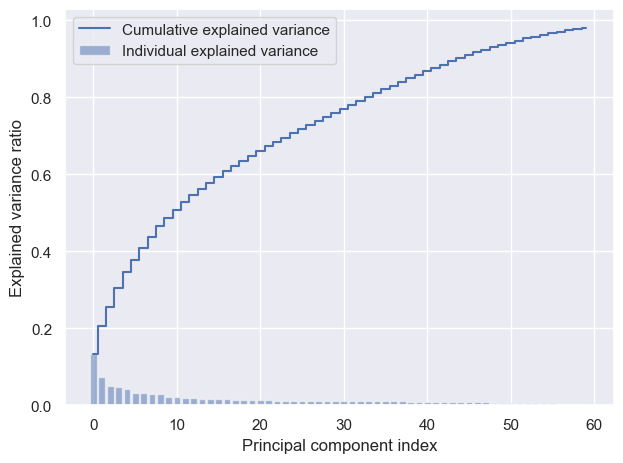

In [81]:
exp_var_pca = pca60.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()